In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
import seaborn as sns
from keras.models import Sequential,load_model
from sklearn.cluster import KMeans
from keras.layers import Dense,Softmax
from keras.utils import to_categorical
import pickle
import h5py

ModuleNotFoundError: No module named 'keras'

In [13]:
train_data=pd.read_csv(r'cloud_train.csv')
train_data=train_data.sample(n=1000)

ParserError: Error tokenizing data. C error: Expected 1 fields in line 6, saw 2


In [12]:
test_data=pd.read_csv(r'cloud_test.csv')
test_data=test_data.sample(n=1000)

FileNotFoundError: [Errno 2] File cloud_test.csv does not exist: 'cloud_test.csv'

In [11]:
train_data.head()

NameError: name 'train_data' is not defined

In [10]:
train_data.shape

NameError: name 'train_data' is not defined

In [7]:
train_data.isnull().sum()

id                   0
dur                  0
proto                0
service              0
state                0
spkts                0
dpkts                0
sbytes               0
dbytes               0
rate                 0
sttl                 0
dttl                 0
sload                0
dload                0
sloss                0
dloss                0
sinpkt               0
dinpkt               0
sjit                 0
djit                 0
swin                 0
stcpb                0
dtcpb                0
dwin                 0
tcprtt               0
synack               0
ackdat               0
smean                0
dmean                0
trans_depth          0
response_body_len    0
ct_srv_src           0
ct_state_ttl         0
ct_dst_ltm           0
ct_src_dport_ltm     0
ct_dst_sport_ltm     0
ct_dst_src_ltm       0
is_ftp_login         0
ct_ftp_cmd           0
ct_flw_http_mthd     0
ct_src_ltm           0
ct_srv_dst           0
is_sm_ips_ports      0
attack_cat 

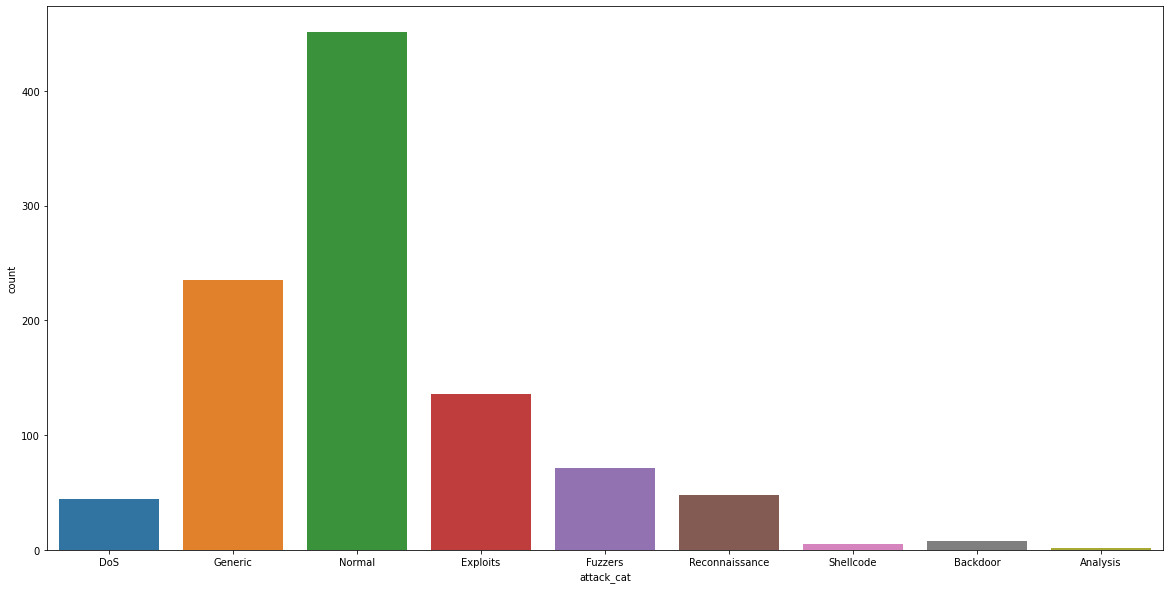

In [8]:
plt.figure(figsize=(20,10))
sns.countplot(train_data['attack_cat'])

In [9]:
attack_type=np.unique(train_data['attack_cat'].values)
attack_type

array(['Analysis', 'Backdoor', 'DoS', 'Exploits', 'Fuzzers', 'Generic',
       'Normal', 'Reconnaissance', 'Shellcode'], dtype=object)

In [0]:
'''
sample_size=10000
norm_percent=20
train_normal=train_data[train_data['attack_cat']=='Normal'].sample(n=int(np.ceil(norm_percent*sample_size/100)))
train_data1=train_data[train_data['attack_cat']!='Normal'].sample(n=10000)
Train_data=pd.concat([train_normal,train_data1])
'''

"\nsample_size=10000\nnorm_percent=20\ntrain_normal=train_data[train_data['attack_cat']=='Normal'].sample(n=int(np.ceil(norm_percent*sample_size/100)))\ntrain_data1=train_data[train_data['attack_cat']!='Normal'].sample(n=10000)\nTrain_data=pd.concat([train_normal,train_data1])\n"

In [10]:
train_data.shape

(1000, 45)

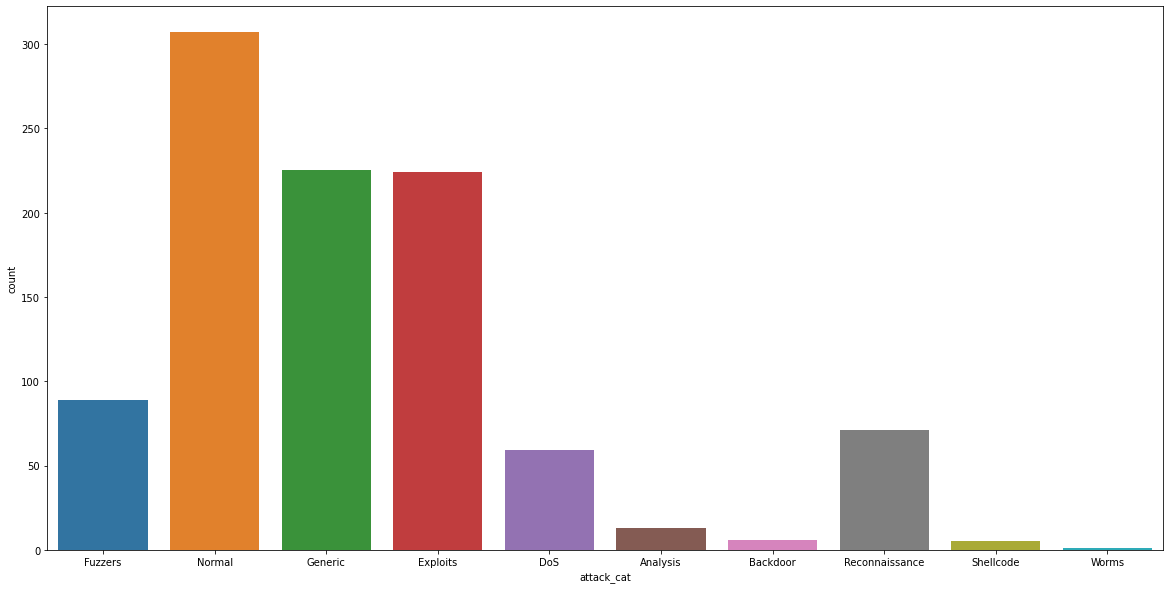

In [11]:
plt.figure(figsize=(20,10))
sns.countplot(test_data['attack_cat'])

In [0]:
cols=np.unique(test_data['attack_cat'].values)


In [13]:
cols

array(['Analysis', 'Backdoor', 'DoS', 'Exploits', 'Fuzzers', 'Generic',
       'Normal', 'Reconnaissance', 'Shellcode', 'Worms'], dtype=object)

In [0]:
label_encoder=LabelEncoder()
def label_encoding(data):
    columns=data.columns
    for cols in columns:
       # print(cols)
        if(isinstance(data[cols].values[0],str)):
            data[cols]=label_encoder.fit_transform(data[cols].values)
    return data

In [0]:
train=label_encoding(train_data)
test=label_encoding(test_data)
X_train=train.drop(['attack_cat','label'],axis=1)
X_test=test.drop(['attack_cat','label'],axis=1)
Y_train=train['attack_cat'].apply(lambda x:int(x))
Y_test=test['attack_cat'].apply(lambda x:int(x))

In [0]:
scaler=StandardScaler()
x_train=scaler.fit_transform(X_train)
x_test=scaler.fit_transform(X_test)

In [17]:
pd.DataFrame(x_train).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42
0,-1.676265,-0.245006,-5.694329,-0.708105,0.978334,-0.379687,-0.266384,-0.160153,-0.142403,0.806340,0.714370,-0.849644,0.689113,-0.271694,-0.325639,-0.203824,-0.117052,-0.083805,-0.126883,-0.203993,-1.092237,-0.821221,-0.827120,-1.053425,-0.667901,-0.642112,-0.641760,-0.176129,-0.488555,-0.322184,-0.050856,-0.323434,0.643821,-0.330064,-0.355772,-0.290892,-0.142679,-0.08396,-0.08396,-0.211213,-0.509634,-0.277024,-0.105463
1,0.617050,-0.245004,0.487799,0.294876,0.978334,-0.379687,-0.266384,-0.163762,-0.142403,0.077577,0.714370,-0.849644,-0.114441,-0.271694,-0.325639,-0.203824,-0.117051,-0.083805,-0.126883,-0.203993,-1.092237,-0.821221,-0.827120,-1.053425,-0.667901,-0.642112,-0.641760,-0.384366,-0.488555,-0.322184,-0.050856,0.199640,0.643821,-0.554673,-0.467826,-0.454039,-0.565557,-0.08396,-0.08396,-0.211213,-0.621715,0.243698,-0.105463
2,1.652329,-0.245004,0.046219,-0.708105,2.533713,-0.379687,-0.266384,-0.164769,-0.142403,0.212533,0.714370,-0.849644,-0.124300,-0.271694,-0.225504,-0.203824,-0.117051,-0.083805,-0.126883,-0.203993,0.915552,-0.821221,-0.827120,-1.053425,-0.667901,-0.642112,-0.641760,-0.442478,-0.488555,-0.322184,-0.050856,-0.236255,4.539861,-0.442369,-0.467826,-0.454039,-0.058103,-0.08396,-0.08396,-0.211213,-0.509634,-0.190237,-0.105463
3,-1.329297,0.274196,0.046219,-0.708105,-0.577046,0.257275,0.768256,-0.114330,0.655075,-0.529410,-1.186366,1.290689,-0.395399,-0.166006,0.275171,0.829260,-0.104637,-0.066531,-0.057433,0.648875,0.915552,1.413103,2.234226,0.949284,1.669893,1.089405,2.153550,-0.398894,3.711907,-0.322184,-0.050856,-0.759329,-0.330189,-0.442369,-0.467826,-0.454039,-0.565557,-0.08396,-0.08396,-0.211213,-0.621715,-0.363811,-0.105463
4,1.666954,-0.055562,0.046219,1.799348,-0.577046,-0.148065,-0.123675,-0.134640,-0.127678,-0.529544,-1.186366,1.290689,-0.395375,-0.266928,-0.125369,-0.127299,-0.105476,-0.037460,-0.051961,-0.156468,0.915552,1.476082,0.339836,0.949284,1.024895,1.174640,0.783351,-0.268141,0.074566,3.033899,-0.045237,-0.323434,-0.330189,-0.330064,-0.243718,-0.127744,-0.142679,-0.08396,-0.08396,14.189690,-0.397552,-0.277024,-0.105463


In [18]:
print(np.unique(Y_train))

[0 1 2 3 4 5 6 7 8]


In [19]:
print(x_train.shape,x_test.shape)

(1000, 43) (1000, 43)


In [20]:
NB=GaussianNB()
NB.fit(x_train,Y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [0]:
acc_NB=NB.score(x_test,Y_test)

In [0]:
cm=confusion_matrix(NB.predict(x_test),Y_test)
acc_per_class_NB=cm.diagonal()/cm.sum(axis=0)

In [23]:
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train,Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [0]:
acc_knn=knn.score(x_test,Y_test)

In [0]:
cm=confusion_matrix(knn.predict(x_test),Y_test)
acc_per_class_knn=cm.diagonal()/cm.sum(axis=0)

In [26]:
rf=RandomForestClassifier(n_estimators=200)
rf.fit(x_train,Y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [0]:
acc_rf=rf.score(x_test,Y_test)

In [0]:
cm=confusion_matrix(rf.predict(x_test),Y_test)
acc_per_class_rf=cm.diagonal()/cm.sum(axis=0)

In [29]:
dt=DecisionTreeClassifier()
dt.fit(x_train,Y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [0]:
acc_dt=dt.score(x_test,Y_test)

In [0]:
cm=confusion_matrix(dt.predict(x_test),Y_test)
acc_per_class_dt=cm.diagonal()/cm.sum(axis=0)

In [32]:
mlp=MLPClassifier()
mlp.fit(x_train,Y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [0]:
acc_mlp=mlp.score(x_test,Y_test)

<BarContainer object of 4 artists>

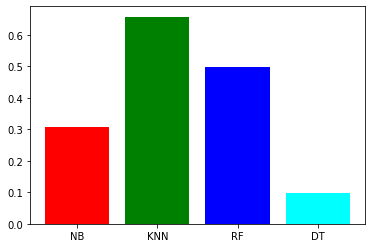

In [34]:
plt.bar(['NB','KNN','RF','DT'],[acc_NB,acc_knn,acc_rf,acc_dt],color=['red','green','blue','cyan'])

In [0]:
cm=confusion_matrix(mlp.predict(x_test),Y_test)
acc_per_class_mlp=cm.diagonal()/cm.sum(axis=0)

In [0]:
acc_per_class=np.vstack([acc_per_class_NB,acc_per_class_knn,acc_per_class_rf,acc_per_class_dt,acc_per_class_mlp])

In [0]:
Acc_per_class=pd.DataFrame(acc_per_class,columns=cols,index=['Naive Bayes','Kth-Nearest Neighbor','Random forest',
                                                                    'DecisionTreeClassifier','MLPClassifier'])

In [38]:
Acc_per_class

,Analysis,Backdoor,DoS,Exploits,Fuzzers,Generic,Normal,Reconnaissance,Shellcode,Worms
Naive Bayes,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.0,0.0
Kth-Nearest Neighbor,0.0,0.166667,0.101695,0.522321,0.269663,0.977778,0.840391,0.436620,0.0,0.0
Random forest,0.0,0.000000,0.000000,0.562500,0.067416,0.293333,0.918567,0.239437,0.0,0.0
DecisionTreeClassifier,0.0,0.000000,0.067797,0.218750,0.101124,0.004444,0.114007,0.000000,0.0,0.0
MLPClassifier,0.0,0.000000,0.084746,0.477679,0.370787,0.942222,0.794788,0.535211,0.0,0.0


One vs all

In [39]:
one_all=OneVsRestClassifier(SVC(kernel='linear'))
one_all.fit(x_train,Y_train)

OneVsRestClassifier(estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                                  class_weight=None, coef0=0.0,
                                  decision_function_shape='ovr', degree=3,
                                  gamma='scale', kernel='linear', max_iter=-1,
                                  probability=False, random_state=None,
                                  shrinking=True, tol=0.001, verbose=False),
                    n_jobs=None)

In [40]:
one_all.score(x_test,Y_test)

0.577

Hyper parameter tuning

3


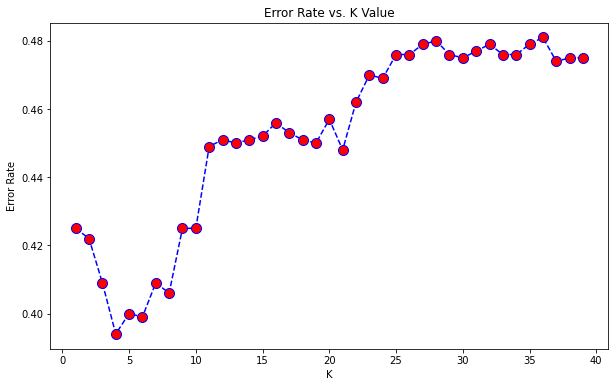

In [45]:
# hyper_parameter tuning for KNN
error_rate = []
# Will take some time
for i in range(1,40):
 knn = KNeighborsClassifier(n_neighbors=i)# for knn hyperparameter is n_neighbors
 knn.fit(X_train,Y_train)
 pred_i = knn.predict(X_test)

 error_rate.append(np.mean(pred_i != Y_test))

plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color="blue", linestyle="dashed", marker="o",
 markerfacecolor="red", markersize=10)
plt.title("Error Rate vs. K Value")
plt.xlabel("K")
plt.ylabel("Error Rate")

index_optimum=error_rate.index(min(error_rate))
print(index_optimum)
K_optimum=index_optimum+1
knn= KNeighborsClassifier(n_neighbors=K_optimum)
knn.fit(x_train,Y_train)
acc_knn_optimum=knn.score(x_test,Y_test)

110


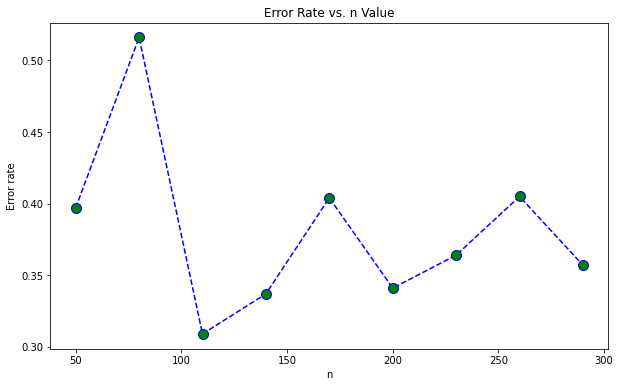

In [100]:
# hyper_parameter tuning for Random Forest
error_rate = []
# Will take some time
min_i=0
min_error=9999
for i in range(50,300,30):
  rf= RandomForestClassifier(n_estimators=i)# for rf hyperparameter is n_estimators
  rf.fit(x_train,Y_train)
  pred_i =rf.predict(x_test)
  if np.mean(pred_i != Y_test)<=min_error:
    min_i=i
    min_error=np.mean(pred_i != Y_test)
    #print(np.mean(pred_i != Y_test))
  error_rate.append(np.mean(pred_i != Y_test))

plt.figure(figsize=(10,6))
plt.plot(range(50,300,30),error_rate,color="blue", linestyle="dashed", marker="o",
 markerfacecolor="green", markersize=10)
plt.title("Error Rate vs. n Value")
plt.xlabel("n")
plt.ylabel("Error rate")
print(min_i)
n_optimum=min_i
rf=RandomForestClassifier(n_estimators=n_optimum)
rf.fit(x_train,Y_train)
acc_rf_optimum=rf.score(x_test,Y_test)

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


500


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


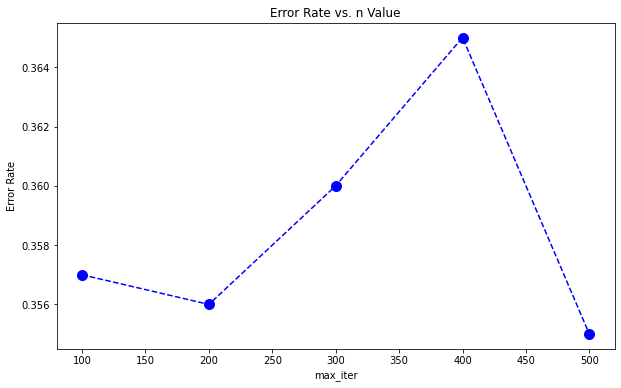

In [101]:
# hyper_parameter tuning for Random Forest
error_rate = []
min_i=0
min_error=999
for i in range(100,600,100):
  mlp=MLPClassifier(max_iter=i)# for mlp hyperparameter is max_iter
  mlp.fit(x_train,Y_train)
  pred_i =mlp.predict(x_test)
  if np.mean(pred_i != Y_test)<=min_error:
    min_i=i
    min_error=np.mean(pred_i != Y_test)
  error_rate.append(np.mean(pred_i != Y_test))

plt.figure(figsize=(10,6))
plt.plot(range(100,600,100),error_rate,color="blue", linestyle="dashed", marker="o",
 markerfacecolor="blue", markersize=10)
plt.title("Error Rate vs. n Value")
plt.xlabel("max_iter")
plt.ylabel("Error Rate")
print(min_i)
iter_optimum=min_i
mlp=MLPClassifier(max_iter=iter_optimum)
mlp.fit(x_train,Y_train)
acc_mlp_optimum=mlp.score(x_test,Y_test)

K-means clustering

In [0]:
x_Train=np.vstack((x_train,x_test))
Y_Train=np.vstack((Y_train,Y_test))

In [136]:
x_train1=np.hstack((x_Train,Y_Train.reshape(-1,1)))
pd.DataFrame(x_train1).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43
0,-1.676265,-0.245006,-5.694329,-0.708105,0.978334,-0.379687,-0.266384,-0.160153,-0.142403,0.806340,0.714370,-0.849644,0.689113,-0.271694,-0.325639,-0.203824,-0.117052,-0.083805,-0.126883,-0.203993,-1.092237,-0.821221,-0.827120,-1.053425,-0.667901,-0.642112,-0.641760,-0.176129,-0.488555,-0.322184,-0.050856,-0.323434,0.643821,-0.330064,-0.355772,-0.290892,-0.142679,-0.08396,-0.08396,-0.211213,-0.509634,-0.277024,-0.105463,2.0
1,0.617050,-0.245004,0.487799,0.294876,0.978334,-0.379687,-0.266384,-0.163762,-0.142403,0.077577,0.714370,-0.849644,-0.114441,-0.271694,-0.325639,-0.203824,-0.117051,-0.083805,-0.126883,-0.203993,-1.092237,-0.821221,-0.827120,-1.053425,-0.667901,-0.642112,-0.641760,-0.384366,-0.488555,-0.322184,-0.050856,0.199640,0.643821,-0.554673,-0.467826,-0.454039,-0.565557,-0.08396,-0.08396,-0.211213,-0.621715,0.243698,-0.105463,5.0
2,1.652329,-0.245004,0.046219,-0.708105,2.533713,-0.379687,-0.266384,-0.164769,-0.142403,0.212533,0.714370,-0.849644,-0.124300,-0.271694,-0.225504,-0.203824,-0.117051,-0.083805,-0.126883,-0.203993,0.915552,-0.821221,-0.827120,-1.053425,-0.667901,-0.642112,-0.641760,-0.442478,-0.488555,-0.322184,-0.050856,-0.236255,4.539861,-0.442369,-0.467826,-0.454039,-0.058103,-0.08396,-0.08396,-0.211213,-0.509634,-0.190237,-0.105463,6.0
3,-1.329297,0.274196,0.046219,-0.708105,-0.577046,0.257275,0.768256,-0.114330,0.655075,-0.529410,-1.186366,1.290689,-0.395399,-0.166006,0.275171,0.829260,-0.104637,-0.066531,-0.057433,0.648875,0.915552,1.413103,2.234226,0.949284,1.669893,1.089405,2.153550,-0.398894,3.711907,-0.322184,-0.050856,-0.759329,-0.330189,-0.442369,-0.467826,-0.454039,-0.565557,-0.08396,-0.08396,-0.211213,-0.621715,-0.363811,-0.105463,3.0
4,1.666954,-0.055562,0.046219,1.799348,-0.577046,-0.148065,-0.123675,-0.134640,-0.127678,-0.529544,-1.186366,1.290689,-0.395375,-0.266928,-0.125369,-0.127299,-0.105476,-0.037460,-0.051961,-0.156468,0.915552,1.476082,0.339836,0.949284,1.024895,1.174640,0.783351,-0.268141,0.074566,3.033899,-0.045237,-0.323434,-0.330189,-0.330064,-0.243718,-0.127744,-0.142679,-0.08396,-0.08396,14.189690,-0.397552,-0.277024,-0.105463,6.0


In [0]:
km=KMeans(n_clusters=6)
km.fit(x_train1)
clusters=km.labels_
cluster=np.unique(clusters)
centroids=km.cluster_centers_

In [0]:
cluster_data={}
for c in cluster:
 cluster_data[c]=x_train1[km.labels_==c]

In [139]:
pd.DataFrame(cluster_data[1]).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43
0,-0.696571,-0.244520,0.487799,-0.708105,-2.132425,-0.321781,-0.195030,-0.146389,-0.138250,-0.500591,-1.493256,-0.603336,-0.382058,0.176334,-0.325639,-0.203824,-0.116983,-0.083688,-0.126873,-0.203897,-1.092237,-0.821221,-0.827120,-1.053425,-0.667901,-0.642112,-0.641760,-0.021163,-0.171539,-0.322184,-0.050856,-0.149076,-1.304199,-0.554673,-0.467826,-0.454039,-0.565557,-0.08396,-0.08396,-0.211213,-0.621715,-0.190237,-0.105463,6.0
1,-0.719446,-0.244481,0.487799,-0.708105,-2.132425,-0.321781,-0.195030,-0.146389,-0.138250,-0.502758,-1.493256,-0.603336,-0.383054,0.143003,-0.325639,-0.203824,-0.116977,-0.083672,-0.126872,-0.203884,-1.092237,-0.821221,-0.827120,-1.053425,-0.667901,-0.642112,-0.641760,-0.021163,-0.171539,-0.322184,-0.050856,0.112461,-1.304199,-0.217759,-0.467826,-0.454039,-0.311830,-0.08396,-0.08396,-0.211213,0.050773,0.070124,-0.105463,6.0
2,-0.338311,-0.236258,0.046219,-0.708105,-0.577046,1.299575,0.839610,-0.017566,0.486412,-0.501711,-1.493256,-0.603336,-0.388787,4.679331,0.375306,0.714473,-0.116971,-0.083518,-0.126388,-0.194153,0.915552,-0.354103,-0.349078,0.949284,-0.659420,-0.629647,-0.638196,-0.369838,2.610694,-0.322184,-0.050856,0.112461,-1.304199,-0.442369,-0.467826,-0.454039,-0.565557,-0.08396,-0.08396,-0.211213,-0.509634,-0.624172,-0.105463,6.0
3,-0.420980,-0.229236,0.046219,-0.708105,-0.577046,0.836330,0.554192,-0.052478,0.185472,-0.518295,-1.493256,-0.603336,-0.392619,1.152286,0.375306,0.408374,-0.116852,-0.083107,-0.125586,-0.178736,0.915552,0.993523,1.036386,0.949284,-0.660157,-0.630623,-0.638621,-0.355310,1.688844,-0.322184,-0.050856,0.112461,-1.304199,-0.442369,-0.467826,-0.454039,-0.565557,-0.08396,-0.08396,-0.211213,0.050773,-0.363811,-0.105463,6.0
4,-0.658486,-0.240650,0.046219,-0.708105,-0.577046,0.025652,0.054711,-0.103924,-0.119947,-0.514384,-1.493256,-0.603336,-0.389988,0.069177,0.074901,-0.050774,-0.116896,-0.083334,-0.125772,-0.203488,0.915552,1.836267,0.338129,0.949284,-0.651616,-0.614499,-0.638834,-0.195500,-0.108970,-0.322184,-0.050856,-0.061897,-1.304199,0.231460,0.092445,-0.454039,-0.058103,-0.08396,-0.08396,-0.211213,0.162854,0.330485,-0.105463,6.0


In [0]:
data_per_cluster=[]
for d in cluster_data:
   data_per_cluster.append(cluster_data[d].shape[0])

<BarContainer object of 6 artists>

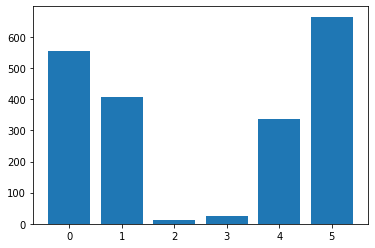

In [141]:
plt.bar(range(len(data_per_cluster)),data_per_cluster)

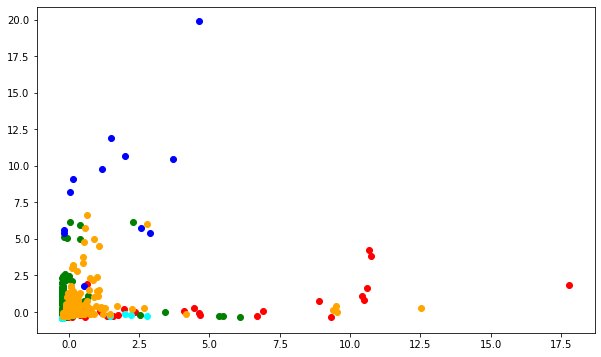

In [142]:
fig, ax = plt.subplots(figsize=(10, 6))
colors=['red','green','blue','yellow','cyan','orange']
for i,C in enumerate(cluster_data):
  plt.scatter(cluster_data[C][:,1],cluster_data[C][:,5],
              c=colors[i])
 

In [0]:
acc_list_per_cluster={}
confusion_matrix_per_cluster={}
for d in cluster_data:
   x=cluster_data[d][:,:-1]
   y=cluster_data[d][:,-1]
   if x.shape[0]>=300:
     acc_list_per_cluster[d]=[]
     confusion_matrix_per_cluster[d]=[]
     #print(x.shape,y.shape)
     train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.2,random_state=False)
     knn=KNeighborsClassifier(n_neighbors=5)
     knn.fit(train_x,train_y)
     acc_list_per_cluster[d].append(knn.score(test_x,test_y))
     confusion_matrix_per_cluster[d].append(confusion_matrix(knn.predict(test_x),test_y))
     rf=RandomForestClassifier()
     rf.fit(train_x,train_y)
     acc_list_per_cluster[d].append(rf.score(test_x,test_y))
     confusion_matrix_per_cluster[d].append(confusion_matrix(rf.predict(test_x),test_y))


In [175]:
acc_list_per_cluster

{0: [0.5855855855855856, 0.6936936936936937],
 1: [0.9512195121951219, 0.9634146341463414],
 4: [0.9558823529411765, 0.9705882352941176],
 5: [0.631578947368421, 0.8421052631578947]}

In [0]:
colors=['red','green','blue','cyan','cyan','orange']

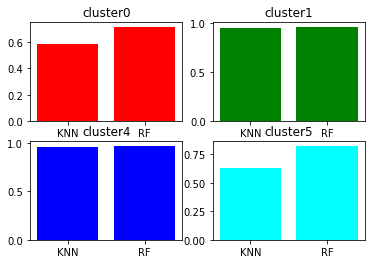

In [168]:
j=0
for c in acc_list_per_cluster:
  #print(j)
  plt.subplot(2,2,j+1)
  plt.bar(['KNN','RF'],acc_list_per_cluster[c],color=colors[j])
  j+=1
  plt.title('cluster'+str(c))

For cluster 0 knn

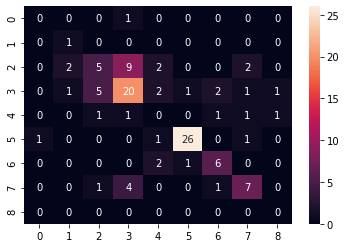

In [178]:
sns.heatmap(confusion_matrix_per_cluster[0][0],annot=True,fmt='d')

For cluster 0 rf

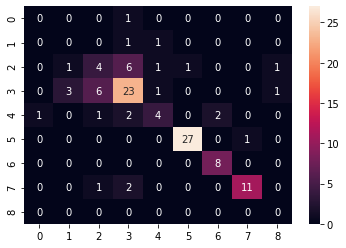

In [179]:
sns.heatmap(confusion_matrix_per_cluster[0][1],annot=True,fmt='d')

For cluster 5 rf

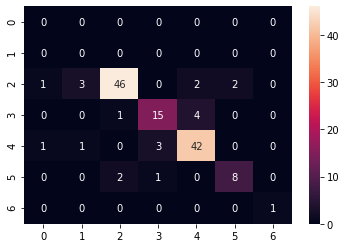

In [181]:
sns.heatmap(confusion_matrix_per_cluster[5][1],annot=True,fmt='d')

For cluster 1 rf


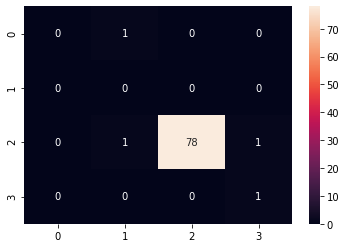

In [182]:
sns.heatmap(confusion_matrix_per_cluster[1][1],annot=True,fmt='d')